In [10]:
import numpy as np
import  pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from scipy.stats import zscore
from typing import List
df = pd.read_csv('Car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
def clean_vehicle_data(df):
    # Remove outliers based on selling price
    Q1 = df['Selling_Price'].quantile(0.25)
    Q3 = df['Selling_Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['Selling_Price'] >= lower_bound) & (df['Selling_Price'] <= upper_bound)]

    # One-hot encode categorical features
    df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], drop_first=True)

    # Handle 'year' column
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce') #Handle potential errors during conversion
    df['age'] = 2024 - df['Year']
    df = df.drop('Year', axis=1)
    
    # Handle missing values
    #df['Kms_Driven'].fillna(df['Kms_Driven'].median(), inplace=True)    
    df['Kms_Driven'] = df['Kms_Driven'].fillna(df['Kms_Driven'].median())

    # Standardize numerical columns
    numerical_cols = ['Selling_Price', 'Kms_Driven', 'age']
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Check and convert data types as necessary
    for column in df.select_dtypes(include=['object']):
        if df[column].str.isnumeric().all():
            df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Drop unnecessary columns
    columns_to_drop = ['Car_Name']  # Customize this list based on irrelevant columns
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    
    return df

# Final check for missing values
print(df.isnull().sum())

# Example usage
car_cleaned = clean_vehicle_data(df)
car_cleaned.head()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3,age
0,-0.118567,5.59,-0.242894,False,True,False,True,False,False,-0.153567
1,0.341223,9.54,0.168830,True,False,False,True,False,False,0.189843
2,1.162275,9.85,-0.760123,False,True,False,True,False,False,-1.183795
3,-0.282777,4.15,-0.803868,False,True,False,True,False,False,0.876661
4,0.291959,6.87,0.154677,True,False,False,True,False,False,-0.153567


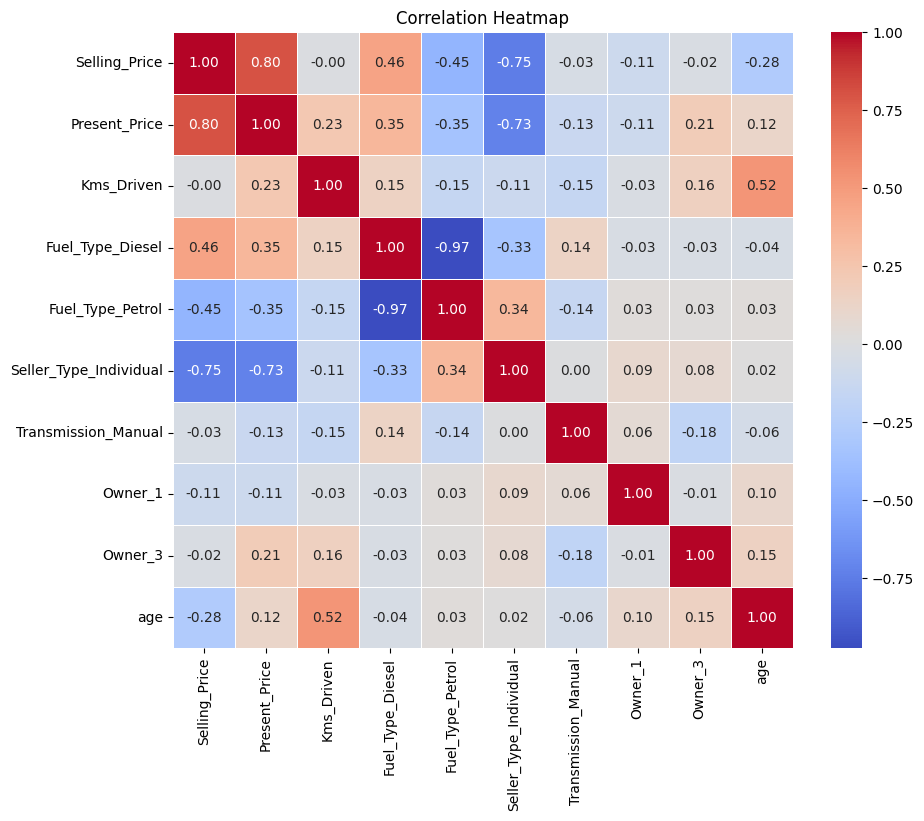

In [12]:
correlation_matrix = car_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
car_cleaned.to_csv('cleaned_vehicle_data.csv', index=False)